In [32]:
#Importing necessary packages for the code (some of them are not used but i put them in case i need them)
import math
import matplotlib.pyplot as plt
import numpy as np

import astropy
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import TimeDelta

from sunpy.coordinates import frames
from sunpy.net import attrs as a
from sunpy.net import hek
from sunpy.physics.differential_rotation import solar_rotate_coordinate
from sunpy.time import parse_time
from sunpy.net import Fido
import sunpy.map
from sunpy.io.special import srs
import sunpy.coordinates
from sunpy.map.maputils import all_coordinates_from_map
from aiapy.calibrate import normalize_exposure, register, update_pointing
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import itertools
from shapely.ops import unary_union

In [33]:
#Fetching results from Fido
result = Fido.search(a.Time('2014/04/09 06:00:00', '2014/04/09 06:10:00'), 
                     a.Instrument.hmi, a.Physobs.los_magnetic_field)
#print(result)
downloaded_file = Fido.fetch(result)

Files Downloaded:   0%|          | 0/11 [00:00<?, ?file/s]

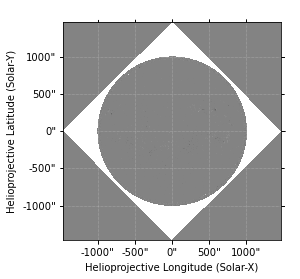

In [34]:
#Printing the HMI image
hmi_map = sunpy.map.Map(downloaded_file[0])
hmi_rotated = hmi_map.rotate(order=3)
plt.figure()
hmi_rotated.plot()
plt.show()

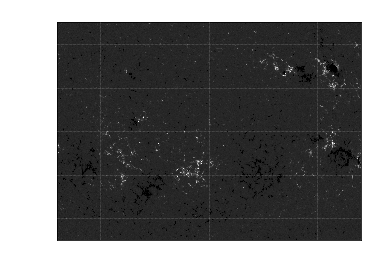

In [35]:
#Image is cut to focus on the area where usually sunspots/pores occur
bottom_left = SkyCoord(-700 * u.arcsec, -500 * u.arcsec, frame=hmi_rotated.coordinate_frame)
top_right = SkyCoord(700 * u.arcsec, 500 * u.arcsec, frame=hmi_rotated.coordinate_frame)
hmi_smap = hmi_rotated.submap(bottom_left, top_right=top_right)
fig = plt.figure()
ax = fig.add_subplot(projection=hmi_rotated)
hmi_smap.plot(axes=ax, clip_interval=(1, 99.99)*u.percent, autoalign=True)
bounds = ax.axis()
ax.axis(bounds)
params = {"text.color" : "white"}
plt.rcParams.update(params)
ax.set_xlabel("Helioprojective Longitude (Solar-X)",color = "white") 
ax.set_ylabel("Helioprojective Latitutde (Solar-Y)", color = "white")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.show()

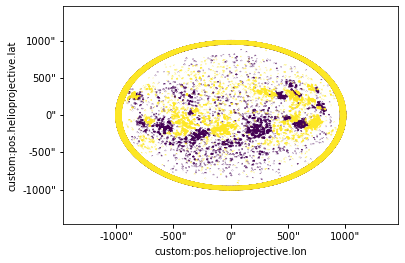

In [36]:
#Magnetic field of the solar atmosphere (dark purple-into the page/ yellow-out of the page)
levels = [-100, 100] * u.Gauss
#ax = fig.add_subplot(projection=hmi_rotated0)
#hmi_rotated0.draw_grid(axes=ax)
hmi_rotated.draw_contours(levels)
hmi_rotated.draw_grid()
plt.show()

In [37]:
#Creating Contour Areas for the Magnetic Field Regions
hmi_contour_neg = hmi_smap.contour(-100* u.Gauss)
hmi_contour_pos = hmi_smap.contour(100*u.Gauss)
#print(hmi_contour_pos)
len(hmi_contour_neg)

2803

In [38]:
#Creating Lists for Contour Areas
pos_len = len(hmi_contour_pos)
neg_len = len(hmi_contour_neg)
len_element_positive = []
len_element_negative = []
for i in range(pos_len):
    values = len(hmi_contour_pos[i])
    len_element_positive.append(values)
for i in range(neg_len):
    values2 = len(hmi_contour_neg[i])
    len_element_negative.append(values2)

In [39]:
#Converting Positive Region Coordinates to String 
#(It has been converted to string as skycoord doesn't support some functions)#
pos_string = []
for i in range(pos_len):
    pos_boundary = SkyCoord(hmi_contour_pos[i]).to_string(unit = u.arcsec, decimal = True)
    pos_string.append(pos_boundary)

In [40]:
#length of Each Element in the Positve Region List
len_el = []
for i in range(len(pos_string)):
    x = len(pos_string[i])
    len_el.append(x)

In [41]:
#Dividing Positive Region into Elements
temp3 = []
for i in range(len(pos_string)):
    new = []
    for l in range(len_el[i]):
        p2 = pos_string[i][l].split(',')
        for v in p2:
            p3 = v.split(" ") 
            new.append(p3)
    temp3.append(new)

In [42]:
#Getting Latitude and Longitude Values of the Positive Regions
x_values_list3 = []
y_values_list3 = []
for n in range(len(temp3)):
    x1 = []
    y1 = []
    for i in range(len_el[n]):
        x_values10 = temp3[n][i][0]
        x1.append(float(x_values10))
        y_values10 = temp3[n][i][1]
        y1.append(float(y_values10))
    x_values_list3.append(x1)
    y_values_list3.append(y1)
#print(y_values_list3)
len1 = len(y_values_list3)
#len2 = len(y_values_list3[0])
#print(len2)
len_y = []
for i in range(len1):
    len2 = len(y_values_list3[i])
    len_y.append(len2)
#print(len(len_y))

In [43]:
#Converting to Coordinates for Postive Regions
pos_coord_list = []
for i in range(len(pos_string)):
    cc0 = zip(x_values_list3[i] ,y_values_list3[i])
    pos_coord_list.append(cc0)
pos_coord_list_new=[]
for l in range(len(pos_string)):
    k0 = list(pos_coord_list[l])
    pos_coord_list_new.append(k0)
#print(type(pos_coord_list_new[0]))
len_len0 = len(pos_coord_list)
len_coord0 = []
for i in range(len(pos_string)):
    pp0 = len(pos_coord_list_new[i])
    len_coord0.append(pp0)
#print(pos_coord_list_new[0])

In [44]:
#North and South Hemisphere for Postive Coordinates
N_pos = []
S_pos= []
for i in range(len(pos_string)):
    N_pos0 = []
    S_pos0 = []
    for l in range(len_el[i]):
        pl0 = pos_coord_list_new[i]
        #print(pl0)
    if pl0[l][1] > 0:
        p_n = pl0[l][1]
            #print(pl0[l])
        N_pos0.append(pl0)
        N_pos.append(pl0)
    else:
        S_pos0.append(pl0)
        S_pos.append(pl0)
len_n_pos = len(N_pos)
len_s_pos = len(S_pos)
#print(len_n_pos)
#print(len_s_pos)

In [45]:
#Checking If There Are Any Positive Regions with Less Than 3 Points
#(We are checking for 3 points so that it can be an area)
Not_a_polygon_N_pos = []
Not_a_polygon_S_pos = []
for el in range(len_n_pos):
    notpoly_n_pos = len(N_pos[el])
    if notpoly_n_pos < 3:
        #notpoly_n_pos_index = el
        #Not_a_polygon_N_pos.append(notpoly_n_pos_index)
        del N_pos[el]
for el in range(len_s_pos):
    notpoly_s_pos = len(S_pos[el])
    if notpoly_s_pos <3:
        notpoly_s_pos_index = el
        Not_a_polygon_S_pos.append(notpoly_s_pos_index)
        del S_pos[el]
#print(Not_a_polygon_S_pos)
#for el in Not_a_polygon_S_pos:
    #del S_pos[el]
    
len_n_pos = len(N_pos)
len_s_pos = len(S_pos)
#print(len_n_pos)
#print(len_s_pos)

In [46]:
#Reflection from Equator (from x-axis)/ Postive Regions
#Refelctions has been created to check if symmetry holds in both hemispheres (Hale's Polarity Law)
new_y_values11= []
for i in range(len(pos_string)):
    yy = []
    for c in range(len_y[i]):
        new_y_values = y_values_list3[i][c] * -1
        yy.append(new_y_values)
    new_y_values11.append(yy)

In [47]:
#Create Skycoord for Reflections
reflected_coord_pos = []
for i in range(len(pos_string)):
    coord4 = SkyCoord(x_values_list3[i],new_y_values11[i], unit = u.arcsec, frame='helioprojective')
    coord5 = coord4.to_string(unit = u.arcsec, decimal = True)
    reflected_coord_pos.append(coord5)

In [48]:
#Dividing Positive Reflected Region into Elements
temp5 = []
for i in range(len(pos_string)):
    new5 = []
    for l in range(len_el[i]):
        p5 = pos_string[i][l].split(',')
        for v in p5:
            p55 = v.split(" ") 
            new5.append(p55)
    temp5.append(new5)

In [49]:
#Converting to Coordinates for Reflected Postive Regions
pos_coord_ref_list = []
for i in range(len(pos_string)):
    cc2 = zip(x_values_list3[i] ,new_y_values11[i])
    pos_coord_ref_list.append(cc2)
pos_coord_list_ref_new=[]
for l in range(len(pos_string)):
    k2 = list(pos_coord_ref_list[l])
    pos_coord_list_ref_new.append(k2)
#print(type(pos_coord_list_ref_new[0]))
len_len2 = len(pos_coord_ref_list)
len_coord1 = []
for i in range(len(pos_string)):
    pp1 = len(pos_coord_list_ref_new[i])
    len_coord1.append(pp1)
#print(k2)

In [50]:
#North and South Hemisphere for Reflected Postive Coordinates
N_pos_ref = []
S_pos_ref = []
for i in range(len(pos_string)):
    N_pos_ref0= []
    S_pos_ref0= []
    for l in range(len_el[i]):
        pl1 = pos_coord_list_ref_new[i]
    if pl1[l][1] > 0:
        N_pos_ref.append(pl1)
    else:
        S_pos_ref.append(pl1)
    #N_pos_ref.append(N_pos_ref0)
    #S_pos_ref.append(S_pos_ref0)
len_n_pos_ref = len(N_pos_ref)
len_s_pos_ref = len(S_pos_ref)
#print(N_pos_ref[0])

In [51]:
#Checking If There Are Any Positive Regions Reflections with Less Than 3 Points
Not_a_polygon_N_pos_ref = []
Not_a_polygon_S_pos_ref = []
for el in range(len_n_pos_ref):
    notpoly_n_pos_ref = len(N_pos_ref[el])
    if notpoly_n_pos_ref <3:
        notpoly_n_pos_ref_index = el
        Not_a_polygon_N_pos_ref.append(notpoly_n_pos_ref_index)
for el in Not_a_polygon_N_pos_ref:
    del N_pos_ref[el]
    
for el in range(len_s_pos_ref):
    notpoly_s_pos_ref = len(S_pos_ref[el])
    if notpoly_s_pos_ref <3:
        notpoly_s_pos_ref_index = el
        Not_a_polygon_S_pos_ref.append(notpoly_s_pos_ref_index)
for el in Not_a_polygon_S_pos_ref:
    del S_pos_ref[el]
    
len_n_pos_ref = len(N_pos_ref)
len_s_pos_ref = len(S_pos_ref)
#print(len_n_pos_ref)
#print(len_s_pos_ref)

In [52]:
#Converting Negative Region Coordinates to String
neg_string = []
for i in range(neg_len):
    neg_boundary = SkyCoord(hmi_contour_neg[i]).to_string(unit = u.arcsec, decimal = True)
    neg_string.append(neg_boundary)

In [53]:
#length of Each Element in the Negative Region List
len_el_n = []
for i in range(len(neg_string)):
    x_neg = len(neg_string[i])
    len_el_n.append(x_neg)
#print(len_el_n)

In [54]:
#Dividing Negative Region into Elements
temp4 = []
for i in range(len(neg_string)):
    new2 = []
    for l in range(len_el_n[i]):
        p22 = neg_string[i][l].split(',')
        for v in p22:
            p32 = v.split(" ") 
            new2.append(p32)
    temp4.append(new2)

In [55]:
#Getting Latitude and Longitude Values of the Negative Regions
x_values_list4 = []
y_values_list4 = []
for n in range(len(temp4)):
    x2 = []
    y2 = []
    for i in range(len_el_n[n]):
        x_values101 = temp4[n][i][0]
        x2.append(float(x_values101))
        y_values101 = temp4[n][i][1]
        y2.append(float(y_values101))
    x_values_list4.append(x2)
    y_values_list4.append(y2)
#print(y_values_list4)
len12 = len(y_values_list4)
#len2 = len(y_values_list3[0])
#print(len12)
len_y2 = []
for i in range(len12):
    len22 = len(y_values_list4[i])
    len_y2.append(len22)
#print(len_y2)
#len_y2.index(449)

In [56]:
#Converting to Coordinates for Negative Region Coordinates
neg_coord_list = []
for i in range(len(neg_string)):
    cc = zip(x_values_list4[i] ,y_values_list4[i])
    neg_coord_list.append(cc)
neg_coord_list_new=[]
for l in range(len(neg_string)):
    k = list(neg_coord_list[l])
    neg_coord_list_new.append(k)
print(type(neg_coord_list_new[0]))
len_len1 = len(neg_coord_list)
len_coord = []
for i in range(len(neg_string)):
        pp = len(list(neg_coord_list[i]))
        len_coord.append(pp)
#print(list(neg_coord_list)[0])

<class 'list'>


In [57]:
#North and South Hemisphere for Negative Coordinates
N_neg = []
S_neg= []
for i in range(len(neg_string)):
    N_neg0= []
    S_neg0= []
    for l in range(len_y2[i]):
        pl = neg_coord_list_new[i]
    if pl[l][1] > 0:
        N_neg.append(pl)
    else:
        S_neg.append(pl)
len_n_neg = len(N_neg)
len_s_neg = len(S_neg)
print(len_n_neg)

862


In [58]:
#Checking If There Are Any Negative Regions with Less Than 3 Points
Not_a_polygon_N_neg= []
Not_a_polygon_S_neg = []
for el in range(len_n_neg):
    notpoly_n_neg = len(N_neg[el])
    if notpoly_n_neg <3:
        notpoly_n_neg_index = el
        Not_a_polygon_N_neg.append(notpoly_n_neg_index)
for el in Not_a_polygon_N_neg:
    del N_neg[el]
    
for el in range(len_s_neg):
    notpoly_s_neg = len(S_neg[el])
    if notpoly_s_neg <3:
        notpoly_s_neg_index = el
        Not_a_polygon_S_neg.append(notpoly_s_neg_index)
for el in Not_a_polygon_S_neg:
    del S_neg[el]
    
len_n_neg = len(N_neg)
len_s_neg = len(S_neg)
#print(Not_a_polygon_N_neg)
#print(len_s_neg)

In [59]:
#Reflection from Equator (from x-axis)/ Negative Regions
new_y_values12= []
for i in range(len(neg_string)):
    yy2 = []
    for l in range(len_y2[i]):
        new_y_values2 = y_values_list4[i][l] * -1
        yy2.append(new_y_values2)
    new_y_values12.append(yy2)
yyy= []
xxx= []
for i in range(len(neg_string)):
    y_length = (len(new_y_values12[i]))
    yyy.append(y_length)
    x_length = (len(x_values_list4[i]))
    xxx.append(x_length)
#print(yyy)
#print(xxx)

In [60]:
#Create Coordinates for Negative Region Reflections
reflected_coord_neg = []
for i in range(len(neg_string)):
    coord2 = SkyCoord(x_values_list4[i],new_y_values12[i], unit = u.arcsec, frame='helioprojective')
    coord3 = coord2.to_string(unit = u.arcsec, decimal = True)
    reflected_coord_neg.append(coord3)
#print(reflected_coord_neg)

In [61]:
#Dividing Elements in Negative Region Reflections
temp6 = []
for i in range(len(neg_string)):
    new6 = []
    for l in range(len_el_n[i]):
        p6 = neg_string[i][l].split(',')
        for v in p6:
            p66 = v.split(" ") 
            new6.append(p66)
    temp6.append(new6)
#print(temp6[0][0])

In [62]:
#Converting to Coordinates for Negative Regions Reflections
neg_coord_ref_list = []
for i in range(len(neg_string)):
    cc5 = zip(x_values_list4[i] ,new_y_values12[i])
    neg_coord_ref_list.append(cc5)
neg_coord_list_ref_new=[]
for l in range(len(neg_string)):
    k4 = list(neg_coord_ref_list[l])
    neg_coord_list_ref_new.append(k4)
#print(type(neg_coord_list_ref_new[0]))
len_len = len(neg_coord_ref_list)
len_coord5 = []
for i in range(len_len):
        pp5 = len(list(neg_coord_ref_list[i]))
        len_coord5.append(pp5)

In [63]:
#North and South Hemisphere for Negative Reflection Coordinates
N_neg_ref = []
S_neg_ref = []
for i in range(len(neg_string)):
    N_neg_ref0 = []
    S_neg_ref0 = []
    for l in range(len_y2[i]):
        pl3 = neg_coord_list_ref_new[i]
    if pl3[l][1] > 0:
        N_neg_ref.append(pl3)
    else:
        S_neg_ref.append(pl3)
len_n_neg_ref = len(N_neg_ref)
len_s_neg_ref = len(S_neg_ref)
#print(len_n_neg_ref)
#print(N_neg_ref[1])

In [64]:
#Checking If There Are Any Negative Regions Reflections with Less Than 3 Points
Not_a_polygon_N_neg_ref= []
Not_a_polygon_S_neg_ref = []
for el in range(len_n_neg_ref):
    notpoly_n_neg_ref = len(N_neg_ref[el])
    if notpoly_n_neg_ref <3:
        notpoly_n_neg_ref_index = el
        Not_a_polygon_N_neg_ref.append(notpoly_n_neg_ref_index)
for el in Not_a_polygon_N_neg_ref:
    del N_neg_ref[el]
    
for el in range(len_s_neg_ref):
    notpoly_s_neg_ref = len(S_neg_ref[el])
    if notpoly_s_neg_ref <3:
        notpoly_s_neg_ref_index = el
        Not_a_polygon_S_neg_ref.append(notpoly_s_neg_ref_index)
for el in Not_a_polygon_S_neg_ref:
    del S_neg_ref[el]
    
len_n_neg_ref = len(N_neg_ref)
len_s_neg_ref = len(S_neg_ref)
#print(len_n_neg_ref)
#print(len_s_neg_ref)

In [65]:
#Positive Polygons in South
pos_poly_s = []
for i in range(len_s_pos):
    pos_polys = Polygon(S_pos[i]).buffer(1)
    pos_poly_s.append(pos_polys)
    #print(pos_poly_s[i])
#print(pos_poly_s)

In [66]:
#Positive Polygons in North
pos_poly_n = []
for i in range(len_n_pos):
    pos_polyn = Polygon(N_pos[i]).buffer(1)
    pos_poly_n.append(pos_polyn)
    #print(pos_poly_n[i])

In [67]:
#Positive Reflected Polygons in South
pos_poly_s_ref = []
for i in range(len_s_pos_ref):
    pos_polys_ref = Polygon(S_pos_ref[i]).buffer(1)
    pos_poly_s_ref.append(pos_polys_ref)
    #print(pos_poly_s_ref[i])
#print(pos_poly_s_ref[1])

In [68]:
#Positive Polygons in North
pos_poly_n_ref = []
for i in range(len_n_pos_ref):
    pos_polyn_ref = Polygon(N_pos_ref[i]).buffer(1)
    pos_poly_n_ref.append(pos_polyn_ref)
    #print(pos_poly_n_ref[i])
#print(pos_poly_n_ref)

In [69]:
#Negative Polygons in South
neg_poly_s = []
for i in range(len_s_neg):
    neg_polys = Polygon(S_neg[i]).buffer(1)
    neg_poly_s.append(neg_polys)
    #print(neg_poly_s[i])
#print(pos_poly_s_ref)

In [70]:
#Negative Polygons in North
neg_poly_n = []
for i in range(len_n_neg):
    neg_polyn = Polygon(N_neg[i]).buffer(1)
    neg_poly_n.append(neg_polyn)
    #print(neg_poly_n[i])

In [71]:
#Negative Reflected Polygons in South
neg_poly_s_ref = []
for i in range(len_s_neg_ref):
    neg_polys_ref = Polygon(S_neg_ref[i]).buffer(1)
    neg_poly_s_ref.append(neg_polys_ref)
    #print(neg_poly_s_ref[i])
#print(neg_poly_s_ref[1])

In [72]:
#Negative Reflected Polygons in North
neg_poly_n_ref = []
for i in range(len_n_neg_ref):
    neg_polyn_ref = Polygon(N_neg_ref[i]).buffer(1)
    neg_poly_n_ref.append(neg_polyn_ref)
    #print(neg_poly_n_ref[i])

In [73]:
#Combined Positive Regions in North Hemisphere
pos_n_combined = unary_union(pos_poly_n)
#print(len(pos_n_combined))

In [74]:
#Combined Positive Regions in South Hemisphere
pos_s_combined = unary_union(pos_poly_s)
#print(len(pos_s_combined))

In [75]:
#Combined Positive Reflected Regions in North Hemisphere
pos_ref_n_combined = unary_union(pos_poly_n_ref)
#print(len(pos_ref_n_combined))

In [76]:
#Combined Positive Reflected Regions in South Hemisphere
pos_ref_s_combined = unary_union(pos_poly_s_ref)
#print(len(pos_ref_s_combined))

In [77]:
#Combined Negative Regions in North Hemisphere
neg_n_combined = unary_union(neg_poly_n)
print(len(neg_n_combined))

574


C:\Users\melis\AppData\Local\Temp/ipykernel_15556/3385745424.py:3: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  print(len(neg_n_combined))


In [78]:
#Combined Negative Regions in South Hemisphere
neg_s_combined = unary_union(neg_poly_s)
len(neg_s_combined)
#print(len(neg_s_combined))

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/593888869.py:3: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(neg_s_combined)


975

In [79]:
#Combined Negative Reflected Regions in North Hemisphere
neg_ref_n_combined = unary_union(neg_poly_n_ref)
len(neg_ref_n_combined)
#print(len(neg_ref_n_combined))

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/449880909.py:3: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(neg_ref_n_combined)


975

In [80]:
#Combined Negative Reflected Regions in South Hemisphere
neg_ref_s_combined = unary_union(neg_poly_s_ref)
#print(len(neg_ref_s_combined))

In [81]:
#Finding if any Positive and Negative regions in South Hemisphere that intersect to find any polarity regions
intersects = []
for i in range(len(neg_s_combined)):
    intersects0 = []
    for l in range(len(pos_s_combined)):
        if neg_s_combined[i].intersects(pos_s_combined[l]) == True:
            intersects0.append(i)
            intersects0.append(l)
    intersects.append(intersects0)
print(intersects)

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/1304717165.py:3: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for i in range(len(neg_s_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/1304717165.py:5: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for l in range(len(pos_s_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/1304717165.py:6: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if neg_s_combined[i].intersects(pos_s_combined[l]) == True:


[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [107, 41], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [226, 56], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [

In [82]:
#Creating a list for polarity regions in South Hemisphere
polarity_region_s0 = list(filter(None, intersects))
#print(polarity_region_s0)

In [83]:
#Removing Repeated Elements
polarity_region_s = []
for i in range(len(polarity_region_s0)):
    list_s = list(dict.fromkeys(polarity_region_s0[i]))
    polarity_region_s.append(list_s)
print(polarity_region_s)

[[107, 41], [226, 56], [512, 266], [886, 624], [910, 751], [949, 740, 748, 749], [953, 752], [954, 751], [956, 751], [967, 764], [972, 766]]


In [84]:
#Negative Index Information (South)
negative_ind_s = []
for i in range(len(polarity_region_s)):
    negative_index_s = polarity_region_s[i][0]
    negative_ind_s.append(negative_index_s)
print(negative_ind_s)

[107, 226, 512, 886, 910, 949, 953, 954, 956, 967, 972]


In [85]:
#Positive Index Information (South)
for l in range(len(polarity_region_s)):
    positive_ind_s = [i[1:] for i in polarity_region_s]
print(positive_ind_s)

[[41], [56], [266], [624], [751], [740, 748, 749], [752], [751], [751], [764], [766]]


In [86]:
#Finding if any Positive and Negative regions in North Hemisphere that intersect to find the polairy regions
intersectn = []
for i in range(len(neg_n_combined)):
    intersectn0 = []
    for l in range(len(pos_n_combined)):
        if neg_n_combined[i].intersects(pos_n_combined[l]) == True:
            intersectn0.append(i)
            intersectn0.append(l)
    intersectn.append(intersectn0)
print(intersectn)

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/2709954999.py:3: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for i in range(len(neg_n_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/2709954999.py:5: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for l in range(len(pos_n_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/2709954999.py:6: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if neg_n_combined[i].intersects(pos_n_combined[l]) == True:


[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [84, 141], [], [], [], [], [], [], [], [], [93, 143], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [133, 169], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [182, 224], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [

In [87]:
#Hale's Law of polarity only applies to bipolar sunpots/pores therefore these 4 blocks above tries to make
#sure that the code is focusing on the polarity regions not singular sunspots/ pores

In [88]:
#Creating a list for polarity regions in North Hemisphere
polarity_region_n0 = list(filter(None, intersectn))
#print(polarity_region_n0[0][0])

In [89]:
#Removing Repeated Elements
polarity_region_n = []
for i in range(len(polarity_region_n0)):
    list_n = list(dict.fromkeys(polarity_region_n0[i]))
    polarity_region_n.append(list_n)
print(polarity_region_n)

[[84, 141], [93, 143], [133, 169], [182, 224], [258, 392], [272, 405], [318, 462], [380, 514], [440, 551], [441, 554], [443, 554], [492, 613, 675, 676, 678, 729], [497, 613], [556, 729], [557, 681, 729]]


In [90]:
#Negative Index Information (North)
negative_ind_n = []
for i in range(len(polarity_region_n)):
    negative_index_n = polarity_region_n[i][0]
    negative_ind_n.append(negative_index_n)
print(negative_ind_n)

[84, 93, 133, 182, 258, 272, 318, 380, 440, 441, 443, 492, 497, 556, 557]


In [91]:
#Positive Index Information (North)
for l in range(len(polarity_region_n)):
    positive_ind_n = [i[1:] for i in polarity_region_n]
print(positive_ind_n)

[[141], [143], [169], [224], [392], [405], [462], [514], [551], [554], [554], [613, 675, 676, 678, 729], [613], [729], [681, 729]]


In [92]:
#Creating Contour Areas for the Magnetic Field Regions for Sunspots
hmi_contour_neg_ss = hmi_smap.contour(-1000* u.Gauss)
hmi_contour_pos_ss = hmi_smap.contour(1000*u.Gauss)
#print(hmi_contour_pos)
len(hmi_contour_neg_ss)

6

In [93]:
#Creating Lists for Contour Areas for Sunspots
pos_len_ss = len(hmi_contour_pos_ss)
neg_len_ss = len(hmi_contour_neg_ss)
len_element_positive_ss = []
len_element_negative_ss = []
for i in range(pos_len_ss):
    values_ss = len(hmi_contour_pos_ss[i])
    len_element_positive_ss.append(values_ss)
for i in range(neg_len_ss):
    values2_ss = len(hmi_contour_neg_ss[i])
    len_element_negative_ss.append(values2_ss)

In [94]:
#Collecting x and y values of the contour areas
x_values_list1_ss = []
y_values_list1_ss = []
for n in range(pos_len_ss):
    x1_ss = []
    y1_ss = []
    for i in range(len_element_positive_ss[n]):
        x_values1_ss = hmi_contour_pos_ss[n][i].Tx
        x1_ss.append(x_values1_ss)
        y_values1_ss = hmi_contour_pos_ss[n][i].Ty
        y1_ss.append(y_values1_ss)
    x_values_list1_ss.append(x1_ss)
    y_values_list1_ss.append(y1_ss)

In [95]:
#Converting Positive Region Coordinates to String
pos_string_ss = []
for i in range(pos_len_ss):
    pos_boundary_ss = SkyCoord(hmi_contour_pos_ss[i]).to_string(unit = u.arcsec, decimal = True)
    pos_string_ss.append(pos_boundary_ss)

In [96]:
#length of Each Element in the Positve Region List
len_el_ss = []
for i in range(len(pos_string_ss)):
    x_ss = len(pos_string_ss[i])
    len_el_ss.append(x_ss)
#print(len_el.index(361))

In [97]:
#Dividing Positive Region into Elements
temp3_ss = []
for i in range(len(pos_string_ss)):
    new_ss = []
    for l in range(len_el_ss[i]):
        p2_ss = pos_string_ss[i][l].split(',')
        for v in p2_ss:
            p3_ss = v.split(" ") 
            new_ss.append(p3_ss)
    temp3_ss.append(new_ss)

In [98]:
#Getting Latitude and Longitude Values of the Positive Regions
x_values_list3_ss = []
y_values_list3_ss = []
for n in range(len(temp3_ss)):
    x1_ss = []
    y1_ss = []
    for i in range(len_el_ss[n]):
        x_values10_ss = temp3_ss[n][i][0]
        x1_ss.append(float(x_values10_ss))
        y_values10_ss = temp3_ss[n][i][1]
        y1_ss.append(float(y_values10_ss))
    x_values_list3_ss.append(x1_ss)
    y_values_list3_ss.append(y1_ss)
#print(y_values_list3)
len1_ss = len(y_values_list3_ss)
#len2 = len(y_values_list3[0])
#print(len2)
len_y_ss = []
for i in range(len1_ss):
    len2_ss = len(y_values_list3_ss[i])
    len_y_ss.append(len2_ss)
#print(len(len_y))

In [99]:
#Converting to Coordinates for Postive Regions
pos_coord_list_ss = []
for i in range(len(pos_string_ss)):
    cc0_ss = zip(x_values_list3_ss[i] ,y_values_list3_ss[i])
    pos_coord_list_ss.append(cc0_ss)
pos_coord_list_new_ss=[]
for l in range(len(pos_string_ss)):
    k0_ss = list(pos_coord_list_ss[l])
    pos_coord_list_new_ss.append(k0_ss)
#print(type(pos_coord_list_new[0]))
len_len0_ss = len(pos_coord_list_ss)
len_coord0_ss = []
for i in range(len(pos_string_ss)):
    pp0_ss = len(pos_coord_list_new_ss[i])
    len_coord0_ss.append(pp0_ss)
#print(pos_coord_list_new[0])

In [100]:
#North and South Hemisphere for Postive Coordinates (Not Skycoord)
#Because Skycoord doesn't allow some functions/ operations
N_pos_ss = []
S_pos_ss= []
for i in range(len(pos_string_ss)):
    N_pos0_ss = []
    S_pos0_ss = []
    for l in range(len_el_ss[i]):
        pl0_ss = pos_coord_list_new_ss[i]
        #print(pl0)
    if pl0_ss[l][1] > 0:
        p_n_ss = pl0_ss[l][1]
            #print(pl0[l])
        N_pos0_ss.append(pl0_ss)
        N_pos_ss.append(pl0_ss)
    else:
        S_pos0_ss.append(pl0_ss)
        S_pos_ss.append(pl0_ss)
len_n_pos_ss = len(N_pos_ss)
len_s_pos_ss = len(S_pos_ss)
#print(len_n_pos)
#print(len_s_pos)

In [101]:
#Checking If There Are Any Positive Regions with Less Than 3 Points
Not_a_polygon_N_pos_ss = []
Not_a_polygon_S_pos_ss = []
for el in range(len_n_pos_ss):
    notpoly_n_pos_ss = len(N_pos_ss[el])
    if notpoly_n_pos_ss < 3:
        #notpoly_n_pos_index = el
        #Not_a_polygon_N_pos.append(notpoly_n_pos_index)
        del N_pos_ss[el]
for el in range(len_s_pos_ss):
    notpoly_s_pos_ss = len(S_pos_ss[el])
    if notpoly_s_pos_ss <3:
        notpoly_s_pos_index_ss = el
        Not_a_polygon_S_pos_ss.append(notpoly_s_pos_index_ss)
        del S_pos_ss[el]
#print(Not_a_polygon_S_pos)
#for el in Not_a_polygon_S_pos:
    #del S_pos[el]
    
len_n_pos_ss = len(N_pos_ss)
len_s_pos_ss = len(S_pos_ss)
#print(len_n_pos)
#print(len_s_pos)

In [102]:
#Reflection from Equator (from x-axis)/ Postive Regions
new_y_values11_ss= []
for i in range(len(pos_string_ss)):
    yy_ss = []
    for c in range(len_y_ss[i]):
        new_y_values_ss = y_values_list3_ss[i][c] * -1
        yy_ss.append(new_y_values_ss)
    new_y_values11_ss.append(yy_ss)

In [103]:
#Create Skycoord for Reflections
reflected_coord_pos_ss = []
for i in range(len(pos_string_ss)):
    coord4_ss = SkyCoord(x_values_list3_ss[i],new_y_values11_ss[i], unit = u.arcsec, frame='helioprojective')
    coord5_ss = coord4_ss.to_string(unit = u.arcsec, decimal = True)
    reflected_coord_pos_ss.append(coord5_ss)

In [104]:
#Dividing Positive Reflected Region into Elements
temp5_ss = []
for i in range(len(pos_string_ss)):
    new5_ss = []
    for l in range(len_el_ss[i]):
        p5_ss = pos_string_ss[i][l].split(',')
        for v in p5_ss:
            p55_ss = v.split(" ") 
            new5_ss.append(p55_ss)
    temp5_ss.append(new5_ss)

In [105]:
#Converting to Coordinates for Reflected Postive Regions
pos_coord_ref_list_ss = []
for i in range(len(pos_string_ss)):
    cc2_ss = zip(x_values_list3_ss[i] ,new_y_values11_ss[i])
    pos_coord_ref_list_ss.append(cc2_ss)
pos_coord_list_ref_new_ss=[]
for l in range(len(pos_string_ss)):
    k2_ss = list(pos_coord_ref_list_ss[l])
    pos_coord_list_ref_new_ss.append(k2_ss)
#print(type(pos_coord_list_ref_new[0]))
len_len2_ss = len(pos_coord_ref_list_ss)
len_coord1_ss = []
for i in range(len(pos_string_ss)):
    pp1_ss = len(pos_coord_list_ref_new_ss[i])
    len_coord1_ss.append(pp1_ss)

In [106]:
#North and South Hemisphere for Reflected Postive Coordinates
N_pos_ref_ss = []
S_pos_ref_ss = []
for i in range(len(pos_string_ss)):
    N_pos_ref0_ss= []
    S_pos_ref0_ss= []
    for l in range(len_el_ss[i]):
        pl1_ss = pos_coord_list_ref_new_ss[i]
    if pl1_ss[l][1] > 0:
        N_pos_ref_ss.append(pl1_ss)
    else:
        S_pos_ref_ss.append(pl1_ss)
    #N_pos_ref.append(N_pos_ref0)
    #S_pos_ref.append(S_pos_ref0)
len_n_pos_ref_ss = len(N_pos_ref_ss)
len_s_pos_ref_ss = len(S_pos_ref_ss)

In [107]:
#Checking If There Are Any Positive Regions Reflections with Less Than 3 Points
Not_a_polygon_N_pos_ref_ss = []
Not_a_polygon_S_pos_ref_ss = []
for el in range(len_n_pos_ref_ss):
    notpoly_n_pos_ref_ss = len(N_pos_ref_ss[el])
    if notpoly_n_pos_ref_ss <3:
        notpoly_n_pos_ref_index_ss = el
        Not_a_polygon_N_pos_ref_ss.append(notpoly_n_pos_ref_index_ss)
for el in Not_a_polygon_N_pos_ref_ss:
    del N_pos_ref_ss[el]
    
for el in range(len_s_pos_ref_ss):
    notpoly_s_pos_ref_ss = len(S_pos_ref_ss[el])
    if notpoly_s_pos_ref_ss <3:
        notpoly_s_pos_ref_index_ss = el
        Not_a_polygon_S_pos_ref_ss.append(notpoly_s_pos_ref_index_ss)
for el in Not_a_polygon_S_pos_ref_ss:
    del S_pos_ref_ss[el]
    
len_n_pos_ref_ss = len(N_pos_ref_ss)
len_s_pos_ref_ss = len(S_pos_ref_ss)
#print(len_n_pos_ref)

In [108]:
#Converting Negative Region Coordinates to String
neg_string_ss = []
for i in range(neg_len_ss):
    neg_boundary_ss = SkyCoord(hmi_contour_neg_ss[i]).to_string(unit = u.arcsec, decimal = True)
    neg_string_ss.append(neg_boundary_ss)
#print(neg_string[0])

In [109]:
#length of Each Element in the Negative Region List
len_el_n_ss = []
for i in range(len(neg_string_ss)):
    x_ss = len(neg_string_ss[i])
    len_el_n_ss.append(x_ss)
#print(len_el_n)

In [110]:
#Dividing Negative Region into Elements
temp4_ss = []
for i in range(len(neg_string_ss)):
    new2_ss = []
    for l in range(len_el_n_ss[i]):
        p22_ss = neg_string_ss[i][l].split(',')
        for v in p22_ss:
            p32_ss = v.split(" ") 
            new2_ss.append(p32_ss)
    temp4_ss.append(new2_ss)

In [111]:
#Getting Latitude and Longitude Values of the Negative Regions
x_values_list4_ss = []
y_values_list4_ss = []
for n in range(len(temp4_ss)):
    x2_ss = []
    y2_ss = []
    for i in range(len_el_n_ss[n]):
        x_values101_ss = temp4_ss[n][i][0]
        x2_ss.append(float(x_values101_ss))
        y_values101_ss = temp4_ss[n][i][1]
        y2_ss.append(float(y_values101_ss))
    x_values_list4_ss.append(x2_ss)
    y_values_list4_ss.append(y2_ss)
#print(y_values_list4)
len12_ss = len(y_values_list4_ss)
#len2 = len(y_values_list3[0])
#print(len12)
len_y2_ss = []
for i in range(len12_ss):
    len22_ss = len(y_values_list4_ss[i])
    len_y2_ss.append(len22_ss)

In [112]:
#Converting to Coordinates for Negative Region Coordinates
neg_coord_list_ss = []
for i in range(len(neg_string_ss)):
    cc_ss = zip(x_values_list4_ss[i] ,y_values_list4_ss[i])
    neg_coord_list_ss.append(cc_ss)
neg_coord_list_new_ss=[]
for l in range(len(neg_string_ss)):
    k_ss = list(neg_coord_list_ss[l])
    neg_coord_list_new_ss.append(k_ss)
print(type(neg_coord_list_new_ss[0]))
len_len1_ss = len(neg_coord_list_ss)
len_coord_ss = []
for i in range(len(neg_string_ss)):
        pp_ss = len(list(neg_coord_list_ss[i]))
        len_coord_ss.append(pp_ss)

<class 'list'>


In [113]:
#North and South Hemisphere for Negative Coordinates
N_neg_ss = []
S_neg_ss= []
for i in range(len(neg_string_ss)):
    N_neg0_ss= []
    S_neg0_ss= []
    for l in range(len_y2_ss[i]):
        pl_ss = neg_coord_list_new_ss[i]
    if pl_ss[l][1] > 0:
        N_neg_ss.append(pl_ss)
    else:
        S_neg_ss.append(pl_ss)
len_n_neg_ss = len(N_neg_ss)
len_s_neg_ss = len(S_neg_ss)

In [114]:
#Checking If There Are Any Negative Regions with Less Than 3 Points
Not_a_polygon_N_neg_ss= []
Not_a_polygon_S_neg_ss = []
for el in range(len_n_neg_ss):
    notpoly_n_neg_ss = len(N_neg_ss[el])
    if notpoly_n_neg_ss <3:
        notpoly_n_neg_index_ss = el
        Not_a_polygon_N_neg_ss.append(notpoly_n_neg_index_ss)
for el in Not_a_polygon_N_neg_ss:
    del N_neg[el]
    
for el in range(len_s_neg_ss):
    notpoly_s_neg_ss = len(S_neg_ss[el])
    if notpoly_s_neg_ss <3:
        notpoly_s_neg_index_ss = el
        Not_a_polygon_S_neg_ss.append(notpoly_s_neg_index_ss)
for el in Not_a_polygon_S_neg_ss:
    del S_neg_ss[el]
    
len_n_neg_ss = len(N_neg_ss)
len_s_neg_ss = len(S_neg_ss)

In [115]:
#Reflection from Equator (from x-axis)/ Negative Regions
new_y_values12_ss= []
for i in range(len(neg_string_ss)):
    yy2_ss = []
    for l in range(len_y2_ss[i]):
        new_y_values2_ss = y_values_list4_ss[i][l] * -1
        yy2_ss.append(new_y_values2_ss)
    new_y_values12_ss.append(yy2_ss)
yyy_ss= []
xxx_ss= []
for i in range(len(neg_string_ss)):
    y_length_ss = (len(new_y_values12_ss[i]))
    yyy_ss.append(y_length_ss)
    x_length_ss = (len(x_values_list4_ss[i]))
    xxx_ss.append(x_length_ss)

In [116]:
#Create Coordinates for Negative Region Reflections
reflected_coord_neg_ss = []
for i in range(len(neg_string_ss)):
    coord2_ss = SkyCoord(x_values_list4_ss[i],new_y_values12_ss[i], unit = u.arcsec, frame='helioprojective')
    coord3_ss = coord2_ss.to_string(unit = u.arcsec, decimal = True)
    reflected_coord_neg_ss.append(coord3_ss)

In [117]:
#Dividing Elements in Negative Region Reflections
temp6_ss = []
for i in range(len(neg_string_ss)):
    new6_ss = []
    for l in range(len_el_n_ss[i]):
        p6_ss = neg_string_ss[i][l].split(',')
        for v in p6_ss:
            p66_ss = v.split(" ") 
            new6_ss.append(p66_ss)
    temp6_ss.append(new6_ss)

In [118]:
#Converting to Coordinates for Negative Regions Reflections
neg_coord_ref_list_ss = []
for i in range(len(neg_string_ss)):
    cc5_ss = zip(x_values_list4_ss[i] ,new_y_values12_ss[i])
    neg_coord_ref_list_ss.append(cc5_ss)
neg_coord_list_ref_new_ss=[]
for l in range(len(neg_string_ss)):
    k4_ss = list(neg_coord_ref_list_ss[l])
    neg_coord_list_ref_new_ss.append(k4_ss)
#print(type(neg_coord_list_ref_new[0]))
len_len_ss = len(neg_coord_ref_list_ss)
len_coord5_ss = []
for i in range(len_len_ss):
        pp5_ss = len(list(neg_coord_ref_list_ss[i]))
        len_coord5_ss.append(pp5_ss)

In [119]:
#North and South Hemisphere for Negative Reflection Coordinates
N_neg_ref_ss = []
S_neg_ref_ss = []
for i in range(len(neg_string_ss)):
    N_neg_ref0_ss = []
    S_neg_ref0_ss = []
    for l in range(len_y2_ss[i]):
        pl3_ss = neg_coord_list_ref_new_ss[i]
    if pl3_ss[l][1] > 0:
        N_neg_ref_ss.append(pl3_ss)
    else:
        S_neg_ref_ss.append(pl3_ss)
len_n_neg_ref_ss = len(N_neg_ref_ss)
len_s_neg_ref_ss = len(S_neg_ref_ss)

In [120]:
#Checking If There Are Any Negative Regions Reflections with Less Than 3 Points
Not_a_polygon_N_neg_ref_ss= []
Not_a_polygon_S_neg_ref_ss = []
for el in range(len_n_neg_ref_ss):
    notpoly_n_neg_ref_ss = len(N_neg_ref_ss[el])
    if notpoly_n_neg_ref_ss <3:
        notpoly_n_neg_ref_index_ss = el
        Not_a_polygon_N_neg_ref_ss.append(notpoly_n_neg_ref_index_ss)
for el in Not_a_polygon_N_neg_ref_ss:
    del N_neg_ref_ss[el]
    
for el in range(len_s_neg_ref_ss):
    notpoly_s_neg_ref_ss = len(S_neg_ref_ss[el])
    if notpoly_s_neg_ref_ss <3:
        notpoly_s_neg_ref_index_ss = el
        Not_a_polygon_S_neg_ref_ss.append(notpoly_s_neg_ref_index_ss)
for el in Not_a_polygon_S_neg_ref_ss:
    del S_neg_ref_ss[el]
    
len_n_neg_ref_ss = len(N_neg_ref_ss)
len_s_neg_ref_ss = len(S_neg_ref_ss)
#print(len_n_neg_ref)
#print(len_s_neg_ref)

In [121]:
#Positive Polygons in South
pos_poly_s_ss = []
for i in range(len_s_pos_ss):
    pos_polys_ss = Polygon(S_pos_ss[i]).buffer(1)
    pos_poly_s_ss.append(pos_polys_ss)
    #print(pos_poly_s[i])
#print(pos_poly_s)

In [122]:
#Positive Polygons in North
pos_poly_n_ss = []
for i in range(len_n_pos_ss):
    pos_polyn_ss = Polygon(N_pos_ss[i]).buffer(1)
    pos_poly_n_ss.append(pos_polyn_ss)
    #print(pos_poly_n[i])

In [123]:
#Positive Reflected Polygons in South
pos_poly_s_ref_ss = []
for i in range(len_s_pos_ref_ss):
    pos_polys_ref_ss = Polygon(S_pos_ref_ss[i]).buffer(1)
    pos_poly_s_ref_ss.append(pos_polys_ref_ss)
    #print(pos_poly_s_ref[i])

In [124]:
#Positive Polygons in North
pos_poly_n_ref_ss = []
for i in range(len_n_pos_ref_ss):
    pos_polyn_ref_ss = Polygon(N_pos_ref_ss[i]).buffer(1)
    pos_poly_n_ref_ss.append(pos_polyn_ref_ss)
    #print(pos_poly_n_ref[i])
#print(pos_poly_n_ref)

In [125]:
#Negative Polygons in South
neg_poly_s_ss = []
for i in range(len_s_neg_ss):
    neg_polys_ss = Polygon(S_neg_ss[i]).buffer(1)
    neg_poly_s_ss.append(neg_polys_ss)
    #print(neg_poly_s[i])
#print(pos_poly_s_ref)

In [126]:
#Negative Polygons in North
neg_poly_n_ss = []
for i in range(len_n_neg_ss):
    neg_polyn_ss = Polygon(N_neg_ss[i]).buffer(1)
    neg_poly_n_ss.append(neg_polyn_ss)
    #print(neg_poly_n[i])

In [127]:
#Negative Reflected Polygons in South
neg_poly_s_ref_ss = []
for i in range(len_s_neg_ref_ss):
    neg_polys_ref_ss = Polygon(S_neg_ref_ss[i]).buffer(1)
    neg_poly_s_ref_ss.append(neg_polys_ref_ss)
    #print(neg_poly_s_ref[i])
#print(neg_poly_s_ref[1])

In [128]:
#Negative Reflected Polygons in North
neg_poly_n_ref_ss = []
for i in range(len_n_neg_ref_ss):
    neg_polyn_ref_ss = Polygon(N_neg_ref_ss[i]).buffer(1)
    neg_poly_n_ref_ss.append(neg_polyn_ref_ss)
    #print(neg_poly_n_ref[i])

In [129]:
#Combined Positive Regions in North Hemisphere
pos_n_combined_ss = unary_union(pos_poly_n_ss)
#print(len(pos_n_combined))

In [130]:
#Combined Positive Regions in South Hemisphere
pos_s_combined_ss = unary_union(pos_poly_s_ss)
#print(pos_s_combined[698])

In [131]:
#Combined Positive Reflected Regions in North Hemisphere
pos_ref_n_combined_ss = unary_union(pos_poly_n_ref_ss)
#print(len(pos_ref_n_combined)

In [132]:
#Combined Positive Reflected Regions in South Hemisphere
pos_ref_s_combined_ss = unary_union(pos_poly_s_ref_ss)
#print(len(pos_ref_s_combined_ss))

In [133]:
#Combined Negative Regions in North Hemisphere
neg_n_combined_ss = unary_union(neg_poly_n_ss)
#print(neg_n_combined_ss[0])

In [134]:
#Combined Negative Regions in South Hemisphere
neg_s_combined_ss = unary_union(neg_poly_s_ss)
#print(neg_s_combined_ss)
#print(len(neg_s_combined))

In [135]:
#Combined Negative Reflected Regions in North Hemisphere
neg_ref_n_combined_ss = unary_union(neg_poly_n_ref_ss)
#len(neg_ref_n_combined_ss)
#print(len(neg_ref_n_combined))

In [136]:
#Combined Negative Reflected Regions in South Hemisphere
neg_ref_s_combined_ss = unary_union(neg_poly_s_ref_ss)
#print(len(neg_ref_s_combined))

In [137]:
#Unary_union function allows to combine areas that are close to each other.
#So that when two hemispheres are compared it gives more area to compare rather than just focusing on small many areas
#It helps to reduce the error as in reality the formation of polarity regions are not exactly like an mirror image in the both hemispheres.

In [138]:
#if poly.geom_type == 'MultiPolygon':
    # do multipolygon things.
#elif poly.geom_type == 'Polygon':
    # do polygon things.
#else:

In [139]:
#Finding positive part of the polarity region with a sunspot in north hemisphere
#if parts are added as the same code for the multipolygon and the polygon doesn't work
polarity_with_ss_pos_n0 = []
if pos_n_combined.geom_type == 'MultiPolygon' and pos_n_combined_ss.geom_type=='MultiPolygon':
    for i in range(len(pos_n_combined)):
        polarity_with_ss_pos_n00 = []
        for l in range(len(pos_n_combined_ss)):
            if pos_n_combined[i].contains(pos_n_combined_ss[l]):
                polarity_with_ss_pos_n00.append(i)
        polarity_with_ss_pos_n0.append(polarity_with_ss_pos_n00)
elif pos_n_combined.geom_type == 'Polygon' and pos_n_combined_ss.geom_type=='MultiPolygon':
    for l in range(len(pos_n_combined_ss)):
         if pos_n_combined.contains(pos_n_combined_ss[l]):
                polarity_with_ss_pos_n0.append(pos_n_combined)
elif pos_n_combined.geom_type == 'MultiPolygon' and pos_n_combined_ss.geom_type== 'Polygon':
    for i in range(len(pos_n_combined)):
        if pos_n_combined[i].contains(pos_n_combined_ss):
            polarity_with_ss_pos_n0.append(i)
elif pos_n_combined.geom_type == 'Polygon'and pos_n_combined_ss.geom_type== 'Polygon':
     if pos_n_combined.contains(pos_n_combined_ss):
            polarity_with_ss_pos_n0.append(pos_n_combined)
#print(polarity_with_ss_s0)

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/2555516043.py:5: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for i in range(len(pos_n_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/2555516043.py:7: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for l in range(len(pos_n_combined_ss)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/2555516043.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if pos_n_combined[i].contains(pos_n_combined_ss[l]):


In [140]:
#Positive part of the polarity region with a sunspot in north hemisphere
#refined by removing postive regions without any sunspots
polarity_with_ss_pos_n000 = list(filter(None, polarity_with_ss_pos_n0))
polarity_with_ss_pos_n = []
if len(polarity_with_ss_pos_n000) > 1:
    for i in range(len(polarity_with_ss_pos_n000)):
        polarity_with_ss_pos_n.append(polarity_with_ss_pos_n000[i][0])
elif len(polarity_with_ss_pos_n000) == 1:
    if type(polarity_with_ss_pos_n000[0]) == int:
         polarity_with_ss_pos_n.append(polarity_with_ss_pos_n000[0])
    else:
        polarity_with_ss_pos_n.append(polarity_with_ss_pos_n000[0][0])
print(polarity_with_ss_pos_n)

[162, 551]


In [141]:
#Finding negative part of the polarity region with a sunspot in north hemisphere
#if parts are added as the same code for the multipolygon and the polygon doesn't work
polarity_with_ss_neg_n0 = []
if neg_n_combined.geom_type == 'MultiPolygon' and neg_n_combined_ss.geom_type=='MultiPolygon':
    for i in range(len(neg_n_combined.geoms)):
        polarity_with_ss_neg_n00 = []
        for l in range(len(neg_n_combined_ss.geoms)):
            if neg_n_combined[i].contains(neg_n_combined_ss[l]):
                polarity_with_ss_neg_n00.append(i)
        polarity_with_ss_neg_n0.append(polarity_with_ss_neg_n00)
elif neg_n_combined.geom_type == 'Polygon' and neg_n_combined_ss.geom_type=='MultiPolygon':
    for l in range(len(neg_n_combined_ss)):
         if neg_n_combined.contains(neg_n_combined_ss[l]):
                polarity_with_ss_neg_n0.append(neg_n_combined)
elif neg_n_combined.geom_type == 'MultiPolygon' and neg_n_combined_ss.geom_type== 'Polygon':
    for i in range(len(neg_n_combined)):
        if neg_n_combined[i].contains(neg_n_combined_ss):
            polarity_with_ss_neg_n0.append(i)
elif neg_n_combined.geom_type == 'Polygon'and neg_n_combined_ss.geom_type== 'Polygon':
     if pos_n_combined.contains(neg_n_combined_ss):
            polarity_with_ss_neg_n0.append(neg_n_combined)
        
#print(polarity_with_ss_neg_n0)

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/3042906666.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if neg_n_combined[i].contains(neg_n_combined_ss[l]):


In [142]:
#Negative part of the polarity region with a sunspot in north hemisphere
#refined by removing negative regions without any sunspots
polarity_with_ss_neg_n000 = list(filter(None, polarity_with_ss_neg_n0))
polarity_with_ss_neg_n = []
if len(polarity_with_ss_neg_n000) > 1:
    for i in range(len(polarity_with_ss_neg_n000)):
        polarity_with_ss_neg_n.append(polarity_with_ss_neg_n000[i][0])
elif len(polarity_with_ss_neg_n000) == 1: 
    if type(polarity_with_ss_neg_n000[0]) == int:
        polarity_with_ss_neg_n.append(polarity_with_ss_neg_n000[0])
    else:
        polarity_with_ss_neg_n.append(polarity_with_ss_neg_n000[0][0])
print(polarity_with_ss_neg_n)

[137, 440, 492]


In [143]:
#Positive part of the polarity region with a sunspot in south hemisphere
#refined by removing postive regions without any sunspots
polarity_with_ss_pos_s0 = []
if pos_s_combined.geom_type == 'MultiPolygon' and pos_s_combined_ss.geom_type=='MultiPolygon':
    for i in range(len(pos_s_combined)):
        polarity_with_ss_pos_s00 = []
        for l in range(len(pos_s_combined_ss)):
            if pos_s_combined[i].contains(pos_s_combined_ss[l]):
                polarity_with_ss_pos_s00.append(i)
        polarity_with_ss_pos_s0.append(polarity_with_ss_pos_s00)
elif pos_s_combined.geom_type == 'Polygon' and pos_s_combined_ss.geom_type=='MultiPolygon':
    for l in range(len(pos_s_combined_ss)):
         if pos_s_combined.contains(pos_s_combined_ss[l]):
                polarity_with_ss_pos_s0.append(pos_s_combined)
elif pos_s_combined.geom_type == 'MultiPolygon' and pos_s_combined_ss.geom_type== 'Polygon':
    for i in range(len(pos_s_combined)):
        if pos_s_combined[i].contains(pos_s_combined_ss):
            polarity_with_ss_pos_s0.append(i)
elif pos_s_combined.geom_type == 'Polygon'and pos_s_combined_ss.geom_type== 'Polygon':
     if pos_s_combined.contains(neg_n_combined_ss):
            polarity_with_ss_pos_s0.append(pos_s_combined)

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/2941137146.py:5: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for i in range(len(pos_s_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/2941137146.py:7: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for l in range(len(pos_s_combined_ss)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/2941137146.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if pos_s_combined[i].contains(pos_s_combined_ss[l]):


In [144]:
#Positive part of the polarity region with a sunspot in south hemisphere
#refined by removing postive regions without any sunspots
polarity_with_ss_pos_s000 = list(filter(None, polarity_with_ss_pos_s0))
polarity_with_ss_pos_s = []
if len(polarity_with_ss_pos_s000) > 1:
    for i in range(len(polarity_with_ss_pos_s000)):
        polarity_with_ss_pos_s.append(polarity_with_ss_pos_s000[i][0])
elif len(polarity_with_ss_pos_s000) == 1:
    if type(polarity_with_ss_pos_s000[0]) == int:
        polarity_with_ss_pos_s.append(polarity_with_ss_pos_s000[0])
    else:
        polarity_with_ss_pos_s.append(polarity_with_ss_pos_s000[0][0])
#print(polarity_with_ss_pos_s)

In [145]:
#Finding negative part of the polarity region with a sunspot in south hemisphere
#if parts are added as the same code for the multipolygon and the polygon doesn't work
polarity_with_ss_neg_s0 = []
if neg_s_combined.geom_type == 'MultiPolygon' and neg_s_combined_ss.geom_type=='MultiPolygon':
    for i in range(len(neg_s_combined)):
        polarity_with_ss_neg_s00 = []
        for l in range(len(neg_s_combined_ss)):
            if neg_s_combined[i].contains(neg_s_combined_ss[l]):
                polarity_with_ss_neg_s00.append(i)
        polarity_with_ss_neg_s0.append(polarity_with_ss_neg_s00)
elif neg_s_combined.geom_type == 'Polygon' and neg_s_combined_ss.geom_type=='MultiPolygon':
    for l in range(len(neg_s_combined_ss)):
         if neg_s_combined.contains(neg_s_combined_ss[l]):
                polarity_with_ss_pos_s0.append(neg_n_combined)
elif neg_s_combined.geom_type == 'MultiPolygon' and neg_s_combined_ss.geom_type== 'Polygon':
    for i in range(len(neg_s_combined)):
        if neg_s_combined[i].contains(neg_s_combined_ss):
            polarity_with_ss_pos_s0.append(i)
elif neg_s_combined.geom_type == 'Polygon'and pos_s_combined_ss.geom_type== 'Polygon':
     if neg_s_combined.contains(neg_s_combined_ss):
            polarity_with_ss_pos_s0.append(neg_s_combined)

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/3725422693.py:5: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for i in range(len(neg_s_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/3725422693.py:7: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for l in range(len(neg_s_combined_ss)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/3725422693.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if neg_s_combined[i].contains(neg_s_combined_ss[l]):


In [146]:
#Negative part of the polarity region with a sunspot in south hemisphere
#refined by removing negative regions without any sunspots
polarity_with_ss_neg_s000 = list(filter(None, polarity_with_ss_neg_s0))
polarity_with_ss_neg_s = []
if len(polarity_with_ss_neg_s000) > 1:
    for i in range(len(polarity_with_ss_neg_s000)):
        polarity_with_ss_neg_s.append(polarity_with_ss_neg_s000[i][0])
elif len(polarity_with_ss_neg_s000) == 1:
    if type(polarity_with_ss_neg_s000[0]) == int:
        polarity_with_ss_neg_s.append(polarity_with_ss_neg_s000[0])
    else:
        polarity_with_ss_neg_s.append(polarity_with_ss_neg_s000[0][0])
#print(polarity_with_ss_neg_s)

In [147]:
#This part of the code (8blocks above) has been only written for the normal coordinates(not reflected ones)
#It is because the indices of the coordinates will be the same in both reflected and non-reflected list
#Therefore, in order to decrease the amount of the code, it has been only coded for non-reflected coordinates
#However, it is important to remember that south ones will work for reflected north coordinates and visa versa

In [148]:
#Finds anti-hale and hale regions by comparing regions in south by comparing reflected-north coordinates
#i is for negative
#l is for positive reflected
hale_i_s = []
hale_l_s = []
antihale_i_s = []
antihale_l_s = []
for i in range(len(neg_s_combined)):
    for l in range(len(pos_ref_s_combined)):
        if neg_s_combined[i].contains(pos_ref_s_combined[l]) == True:
            hale_i_s.append(str(i))
            hale_l_s.append(str(l))
        elif neg_s_combined[i].intersects(pos_ref_s_combined[l]) == True:
            hale_i_s.append(str(i))
            hale_l_s.append(str(l))
        elif neg_s_combined[i].touches(pos_ref_s_combined[l]) == True:
            hale_i_s.append(str(i))
            hale_l_s.append(str(l))
        else:
            antihale_i_s.append(str(i))
            antihale_l_s.append(str(l))

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/1545097780.py:8: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for i in range(len(neg_s_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/1545097780.py:9: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for l in range(len(pos_ref_s_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/1545097780.py:10: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if neg_s_combined[i].contains(pos_ref_s_combined[l]) == True:
C:\Users\melis\AppData\Loc

In [149]:
#This allows to extract the indices of negative regions that follow the hale's law of polarity
list_hale_i_s = list(dict.fromkeys(hale_i_s))
#print(list_hale_i_s)

In [150]:
#This allows to extract the indices of postive reflected regions that follow the hale's law of polarity
list_hale_l_s = list(dict.fromkeys(hale_l_s))

In [151]:
#This allows to extract the indices of negative regions that don't follow the hale's law of polarity
list_antihale_i = list(dict.fromkeys(antihale_i_s))

In [152]:
#This allows to extract the indices of postive reflected regions that don't follow the hale's law of polarity
list_antihale_l = list(dict.fromkeys(antihale_l_s))
#print(list_antihale_l)

In [153]:
#The code sometimes adds the regions to anti-hale region as they don't intersect with some other areas
#even though those regions are hale regions
#therefore this part of the code removes the items in anti-hale list that are already in the hale list
anti_hale_new0_i = [el for el in list_antihale_i if el not in list_hale_i_s]
anti_hale_new_i = [float(i) for i in anti_hale_new0_i]
#print(anti_hale_new)

In [154]:
#The code sometimes adds the regions to anti-hale region as they don't intersect with some other areas
#even though those regions are hale regions
#therefore this part of the code removes the items in anti-hale list that are already in the hale list
anti_hale_new0_l = [el for el in list_antihale_l if el not in list_hale_l_s]
anti_hale_new_l = [float(i) for i in anti_hale_new0_l]

In [155]:
#Finds anti-hale and hale regions by comparing regions in south by comparing reflected-north coordinates
#i is for postive
#l is for negative reflected
hale_i_s_p = []
hale_l_s_p = []
antihale_i_s_p = []
antihale_l_s_p = []
for i in range(len(pos_s_combined)):
    for l in range(len(neg_ref_s_combined)):
        if pos_s_combined[i].contains(neg_ref_s_combined[l]) == True:
            hale_i_s_p.append(str(i))
            hale_l_s_p.append(str(l))
        elif pos_s_combined[i].intersects(neg_ref_s_combined[l]) == True:
            hale_i_s_p.append(str(i))
            hale_l_s_p.append(str(l))
        elif pos_s_combined[i].touches(neg_ref_s_combined[l]) == True:
            hale_i_s_p.append(str(i))
            hale_l_s_p.append(str(l))
        else:
            antihale_i_s_p.append(str(i))
            antihale_l_s_p.append(str(l))

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/1531766084.py:8: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for i in range(len(pos_s_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/1531766084.py:9: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for l in range(len(neg_ref_s_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/1531766084.py:10: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if pos_s_combined[i].contains(neg_ref_s_combined[l]) == True:
C:\Users\melis\AppData\Loc

In [156]:
#This allows to extract the indices of postive regions that follow the hale's law of polarity
list_hale_i_s_p = list(dict.fromkeys(hale_i_s_p))
#print(list_hale_i_s_p)

In [157]:
#This allows to extract the indices of negative regions that follow the hale's law of polarity
list_hale_l_s_p = list(dict.fromkeys(hale_l_s_p))

In [158]:
#This allows to extract the indices of postive regions that don't follow the hale's law of polarity
list_antihale_i_p = list(dict.fromkeys(antihale_i_s_p))
#print(list_antihale_i_p)

In [159]:
#This allows to extract the indices of neagtive regions that don't follow the hale's law of polarity
list_antihale_l_p = list(dict.fromkeys(antihale_l_s_p))
print(list_antihale_l_p)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

In [160]:
#The code sometimes adds the regions to anti-hale region as they don't intersect with some other areas
#even though those regions are hale regions
#therefore this part of the code removes the items in anti-hale list that are already in the hale list
anti_hale_new0_p = [el for el in list_antihale_i_p if el not in list_hale_i_s_p]
anti_hale_new_p_i = [float(i) for i in anti_hale_new0_p]
#print(anti_hale_new_p_i)

In [161]:
#The code sometimes adds the regions to anti-hale region as they don't intersect with some other areas
#even though those regions are hale regions
#therefore this part of the code removes the items in anti-hale list that are already in the hale list
anti_hale_new0_p_l = [el for el in list_antihale_l_p if el not in list_hale_l_s_p]
anti_hale_new_p_l = [float(i) for i in anti_hale_new0_p_l]
print(anti_hale_new_p_l)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 102.0, 103.0, 104.0, 105.0, 107.0, 109.0, 111.0, 113.0, 114.0, 115.0, 116.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 127.0, 128.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 158.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 1

In [162]:
# Python program to find common elements in
# both sets using intersection function in
# sets


# function
def common_member(ac, b):
	ac_set = set(ac)
	b_set = set(b)
	
	# check length
	if len(ac_set.intersection(b_set)) > 0:
		return(ac_set.intersection(b_set))
	else:
		return("")
	

ac = [1, 2, 3, 4, 5]
b = [5, 6, 7, 8, 9]
print(common_member(ac, b))

ac =[1, 2, 3, 4, 5]
b =[6, 7, 8, 9]
print(common_member(ac, b))


{5}



In [163]:
#common_south = list(common_member(anti_hale_new,negative_ind_s))
#print(common_south)

In [164]:
#Finds anti-hale and hale regions by comparing regions in north by comparing reflected-south coordinates
#i is for negative
#l is for positive reflected
hale_i_n = []
hale_l_n = []
antihale_i_n = []
antihale_l_n = []
for i in range(len(neg_n_combined)):
    for l in range(len(pos_ref_n_combined)):
        if neg_n_combined[i].contains(pos_ref_n_combined[l]) == True:
            hale_i_n.append(str(i))
            hale_l_n.append(str(l))
        elif neg_n_combined[i].intersects(pos_ref_n_combined[l]) == True:
            hale_i_n.append(str(i))
            hale_l_n.append(str(l))
        elif neg_n_combined[i].touches(pos_ref_n_combined[l]) == True:
            hale_i_n.append(str(i))
            hale_l_n.append(str(l))
        else:
            antihale_i_n.append(str(i))
            antihale_l_n.append(str(l))

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/3120379964.py:8: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for i in range(len(neg_n_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/3120379964.py:9: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for l in range(len(pos_ref_n_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/3120379964.py:10: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if neg_n_combined[i].contains(pos_ref_n_combined[l]) == True:
C:\Users\melis\AppData\Loc

In [165]:
#This allows to extract the indices of negative regions that follow the hale's law of polarity
list_hale_i_n = list(dict.fromkeys(hale_i_n))
#print(list_hale_i_n)

In [166]:
#This allows to extract the indices of postive reflected regions that follow the hale's law of polarity
list_hale_l_n = list(dict.fromkeys(hale_l_n))
#print(list_hale_l_n)

In [167]:
#This allows to extract the indices of negative regions that don't follow the hale's law of polarity
list_antihale_i_n = list(dict.fromkeys(antihale_i_n))
#print(list_antihale_i_n)

In [168]:
#This allows to extract the indices of positve reflected regions that don't follow the hale's law of polarity
list_antihale_l_n = list(dict.fromkeys(antihale_l_n))

In [169]:
#The code sometimes adds the regions to anti-hale region as they don't intersect with some other areas
#even though those regions are hale regions
#therefore this part of the code removes the items in anti-hale list that are already in the hale list
anti_hale_i_north0 = [el for el in list_antihale_i_n if el not in list_hale_i_n]
anti_hale_i_north = [float(i) for i in anti_hale_i_north0]

In [170]:
#The code sometimes adds the regions to anti-hale region as they don't intersect with some other areas
#even though those regions are hale regions
#therefore this part of the code removes the items in anti-hale list that are already in the hale list
anti_hale_l_north0 = [el for el in list_antihale_l_n if el not in list_hale_l_n]
anti_hale_l_north = [float(i) for i in anti_hale_l_north0]

In [171]:
#Finds anti-hale and hale regions by comparing regions in north by comparing reflected-south coordinates
#i is for postive
#l is for negative reflected
hale_i_n_p = []
hale_l_n_p = []
antihale_i_n_p = []
antihale_l_n_p = []
for i in range(len(pos_n_combined)):
    for l in range(len(neg_ref_n_combined)):
        if pos_n_combined[i].contains(neg_ref_n_combined[l]) == True:
            hale_i_n_p.append(str(i))
            hale_l_n_p.append(str(l))
        elif pos_n_combined[i].intersects(neg_ref_n_combined[l]) == True:
            hale_i_n_p.append(str(i))
            hale_l_n_p.append(str(l))
        elif pos_n_combined[i].touches(neg_ref_n_combined[l]) == True:
            hale_i_n_p.append(str(i))
            hale_l_n_p.append(str(l))
        else:
            antihale_i_n_p.append(str(i))
            antihale_l_n_p.append(str(l))

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/678455991.py:8: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for i in range(len(pos_n_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/678455991.py:9: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for l in range(len(neg_ref_n_combined)):
C:\Users\melis\AppData\Local\Temp/ipykernel_15556/678455991.py:10: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  if pos_n_combined[i].contains(neg_ref_n_combined[l]) == True:
C:\Users\melis\AppData\Local\

In [172]:
#This allows to extract the indices of positive regions that follow the hale's law of polarity
list_hale_i_n_p = list(dict.fromkeys(hale_i_n_p))
#print(list_hale_i_n_p)

In [173]:
#This allows to extract the indices of negative regions that follow the hale's law of polarity
list_hale_l_n_p = list(dict.fromkeys(hale_l_n_p))

In [174]:
#This allows to extract the indices of positive regions that don't follow the hale's law of polarity
list_antihale_i_n_p = list(dict.fromkeys(antihale_i_n_p))

In [175]:
#This allows to extract the indices of negative regions that don't follow the hale's law of polarity
list_antihale_l_n_p = list(dict.fromkeys(antihale_l_n_p))

In [176]:
#The code sometimes adds the regions to anti-hale region as they don't intersect with some other areas
#even though those regions are hale regions
#therefore this part of the code removes the items in anti-hale list that are already in the hale list
anti_hale_i_north0_p = [el for el in list_antihale_i_n_p if el not in list_hale_i_n_p]
anti_hale_i_north_p = [float(i) for i in anti_hale_i_north0_p]

In [177]:
#The code sometimes adds the regions to anti-hale region as they don't intersect with some other areas
#even though those regions are hale regions
#therefore this part of the code removes the items in anti-hale list that are already in the hale list
anti_hale_l_north0_p = [el for el in list_antihale_l_n_p if el not in list_hale_l_n_p]
anti_hale_l_north_p = [float(i) for i in anti_hale_l_north0_p]

In [178]:
#Test of using common elements function
common_north = list(common_member(anti_hale_i_north,negative_ind_n))
#print(common_north)

In [179]:
#Common elements in positive sunspot regions and in antihale regions in the north hemisphere (using reflections)
cm_pos_n_neg = common_member(polarity_with_ss_pos_n, anti_hale_new_l)

In [180]:
#Common elements in negative sunspot regions and in antihale regions in the north hemisphere
cm_neg_n_neg= common_member(polarity_with_ss_neg_n, anti_hale_i_north)
#print(cm_neg_n_neg)

In [181]:
#Common elements in positive sunspot regions and in antihale regions in the south hemisphere (using reflections
cm_pos_s_neg = common_member(polarity_with_ss_pos_s, anti_hale_l_north)

In [182]:
#Common elements in negative sunspot regions and in antihale regions in the south hemisphere
cm_neg_s_neg = common_member(polarity_with_ss_neg_s,anti_hale_new_i)
#print(cm_neg_s_neg)

In [183]:
#Common elements in negative sunspot regions and in antihale regions in the north hemisphere (using reflections)
cm_neg_n_pos = common_member(polarity_with_ss_neg_n, anti_hale_new_p_l)
#print(cm_neg_n_pos)

In [184]:
##Common elements in positive sunspot regions and in antihale regions in the north hemisphere
cm_pos_n_pos = common_member(polarity_with_ss_pos_n, anti_hale_i_north_p)

In [185]:
#Common elements in negative sunspot regions and in antihale regions in the south hemisphere (using reflections)
cm_neg_s_pos = common_member(polarity_with_ss_neg_s, anti_hale_l_north_p)
#print(cm_neg_s_pos)

In [186]:
#Common elements in positive sunspot regions and in antihale regions in the south hemisphere
cm_pos_s_pos = common_member(polarity_with_ss_pos_s, anti_hale_new_p_i)

In [187]:
#Common elements in positive sunspot regions and in antihale regions in the south hemisphere
#and reflected-south positive sunspot regions and in antihale regions in the south hemisphere
common_elements_south_pos = common_member(cm_pos_s_neg,cm_pos_s_pos)
print(common_elements_south_pos)

In [188]:
#Common elements in negative sunspot regions and in antihale regions in the south hemisphere
#and reflected-south negative sunspot regions and in antihale regions in the south hemisphere#
common_elements_south_neg = common_member(cm_neg_s_neg,cm_neg_s_pos)
print(common_elements_south_neg)

{703}


In [189]:
#Common elements in positive sunspot regions and in antihale regions in the north hemisphere
#and reflected-north positive sunspot regions and in antihale regions in the north hemisphere
common_elements_south_pos = common_member(cm_pos_s_neg,cm_pos_s_pos)
common_elements_north_pos = common_member(cm_pos_n_neg,cm_pos_n_pos)
print(common_elements_north_pos)

{162}


In [190]:
#Common elements in negative sunspot regions and in antihale regions in the north hemisphere
#and reflected-north negative sunspot regions and in antihale regions in the north hemisphere
common_elements_north_neg = common_member(cm_neg_n_neg,cm_neg_n_pos)
print(common_elements_north_neg)

{137}


In [191]:
#Coordinates of the contoured area
ch_boundary = SkyCoord(
    list(zip(*pos_s_combined[290].exterior.coords.xy))*u.arcsec,
    obstime=hmi_rotated.date, observer="earth",
    frame=frames.Helioprojective)
#rotated_ch_boundary = solar_rotate_coordinate(ch_boundary, time=aia_map.date)

C:\Users\melis\AppData\Local\Temp/ipykernel_15556/4259802938.py:3: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  list(zip(*pos_s_combined[290].exterior.coords.xy))*u.arcsec,


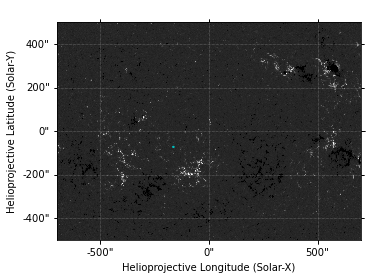

In [192]:
#Prints the image with a contoured area
fig = plt.figure()
ax = fig.add_subplot(projection=hmi_smap)
hmi_smap.plot(axes=ax, clip_interval=(1, 99.99)*u.percent)
ax.plot_coord(ch_boundary, color='c')
#plt.colorbar()

plt.show()

In [193]:
#print(pos_n_combined[179].area)

In [194]:
#neg_n_combined[153].area

In [195]:
#pos_s_combined[302].area

In [196]:
#neg_s_combined[694].area

In [197]:
#Small note from the creator:
#The code could have been improved by comparing
#x values (longtitudes) of the negative and postive regions in a bipolar regions
#rather than checking symmetry in both hemispheres
#However, within 6-week timeframe, this is the code that has been written.
#The improved version will be on my github soon.